### Load libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data from admissions.csv 

In [2]:
!!cd

['E:\\classroom\\ds\\nov11\\admission']

In [3]:
df = pd.read_csv("admission.csv")

#### Understand data 

In [4]:
df.head()

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(500, 9)

In [6]:
# drop column Sno as it is not imp.
df.drop(columns=['Sno'], inplace=True) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Gre         500 non-null int64
Toefl       500 non-null int64
Rating      500 non-null int64
Sop         500 non-null float64
Lor         500 non-null float64
Cgpa        500 non-null float64
Research    500 non-null int64
Chance      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [8]:
df.describe()

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Data Visualization 

### Univariate Analysis

In [9]:
df['Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: Rating, dtype: int64

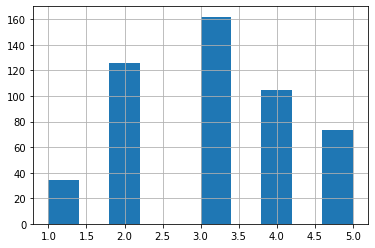

In [10]:
df['Rating'].hist()

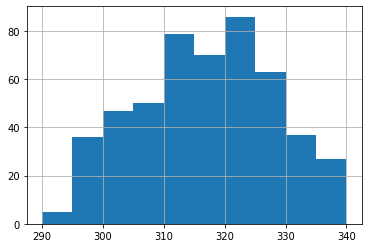

In [11]:
df['Gre'].hist()

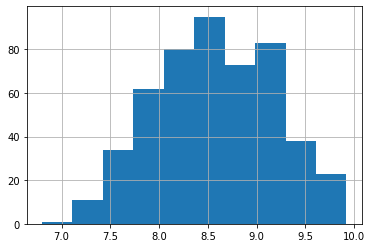

In [12]:
df['Cgpa'].hist()

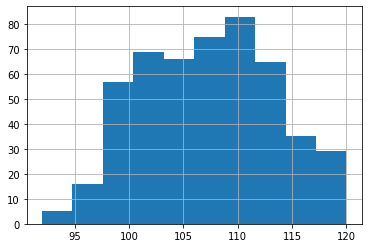

In [13]:
df['Toefl'].hist()

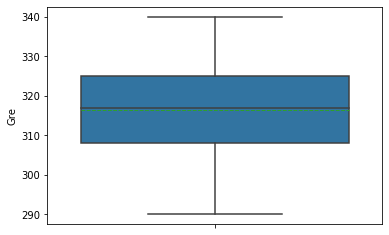

In [14]:
sns.boxplot(y="Gre",orient="v", data=df, showmeans=True, meanline=True)

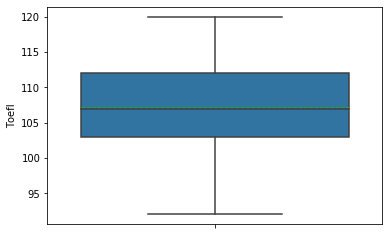

In [15]:
sns.boxplot(y="Toefl",orient="v", data=df, showmeans=True, meanline=True)

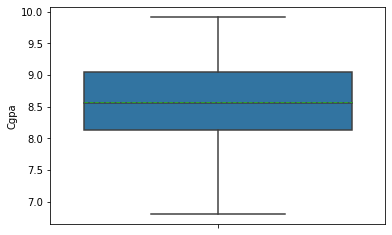

In [16]:
sns.boxplot(y="Cgpa",orient="v", data=df, showmeans=True, meanline=True)

#### Bi-variate Ananlysis

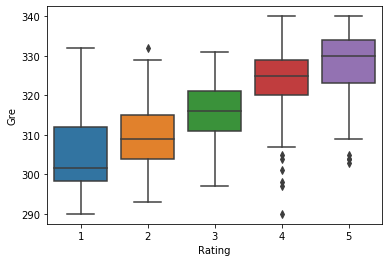

In [17]:
sns.boxplot(y="Gre", x = "Rating", data=df)   # Compare categorical with continous variable 

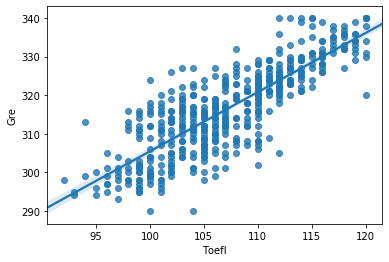

In [18]:
sns.regplot(x="Toefl", y = "Gre", data = df)

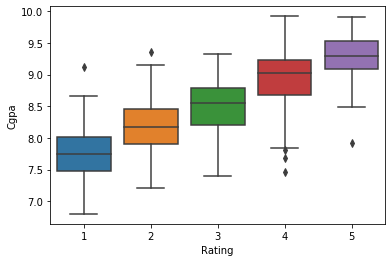

In [19]:
sns.boxplot(y="Cgpa", x ="Rating", data=df)

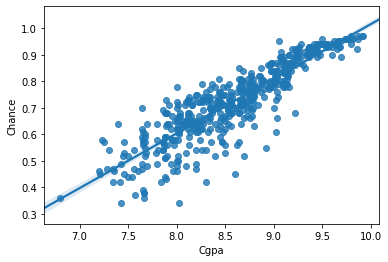

In [20]:
sns.regplot(data=df, x='Cgpa',y='Chance') 

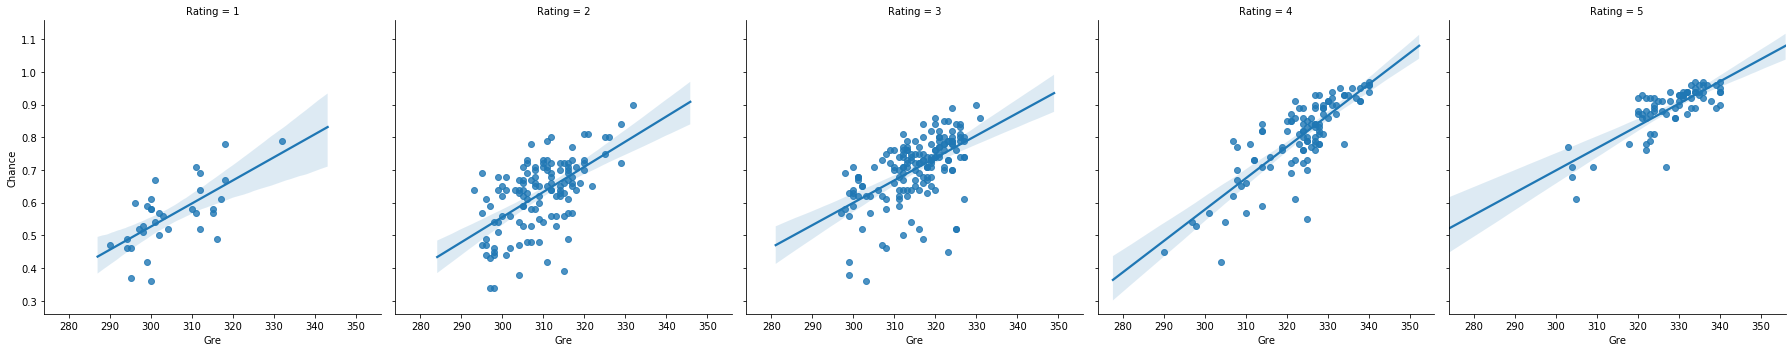

In [21]:
sns.lmplot(data=df, x='Gre',y='Chance', col="Rating") 

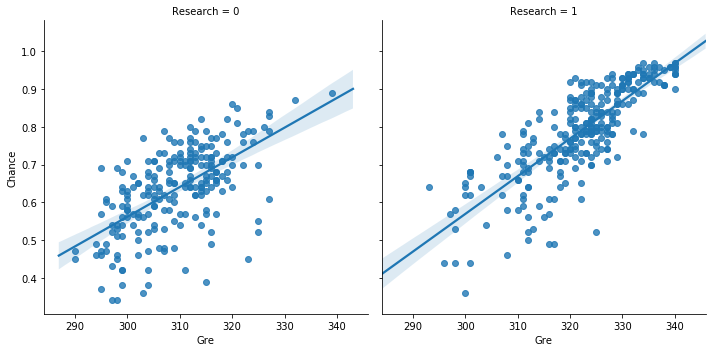

In [22]:
sns.lmplot(data=df, x='Gre',y='Chance', col="Research") 

In [23]:
corrmat = df.corr()
type(corrmat)

pandas.core.frame.DataFrame

In [24]:
corrmat

,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
Gre,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
Toefl,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
Sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
Lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
Cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [25]:
corrmat['Chance'].sort_values(ascending=False)

Chance      1.000000
Cgpa        0.882413
Gre         0.810351
Toefl       0.792228
Rating      0.690132
Sop         0.684137
Lor         0.645365
Research    0.545871
Name: Chance, dtype: float64

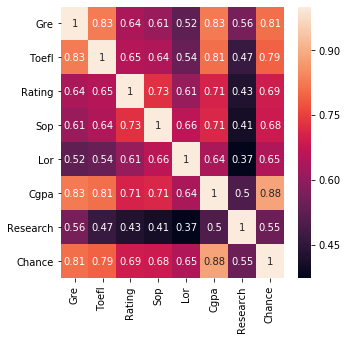

In [26]:
sns.heatmap(corrmat, annot=True)
plt.gcf().set_size_inches(5,5)

### Build Machine Learning Model 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
X = df[['Gre','Toefl','Cgpa']]
y = df['Chance']
print(X.shape,y.shape)

(500, 3) (500,)


In [30]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
## Fit model or Training Model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)  # Build model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lr_model.coef_

array([0.00253005, 0.00317892, 0.14254275])

In [36]:
lr_model.intercept_

-1.6424396080709749

### Evaluate Model 

In [76]:
lr_model.score(X_train,y_train)

0.8122343451664387

In [32]:
## Evaluate Model using test data 
y_pred =lr_model.predict(X_test)

In [33]:
res = pd.DataFrame({'Actual' : y_test, 'Pred' : y_pred})

In [39]:
res.head(10)

,Actual,Pred
90,0.64,0.628022
254,0.85,0.832094
283,0.80,0.791198
445,0.91,0.850461
461,0.68,0.602229
15,0.54,0.668889
316,0.54,0.552973
489,0.65,0.682931
159,0.52,0.552966
153,0.79,0.758333


In [42]:
## get MSE, R2 and MAE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
# print(mse)
print(f"Mean Squared Error : {mse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

Mean Squared Error : 0.00
R2 Score: 0.76
Mean Absolute Error : 0.05


## pickle model

In [43]:
pd.to_pickle(lr_model,'lr_model.pickle')

### Model with all features 

In [44]:
X2 = df[['Gre','Toefl','Cgpa','Rating','Sop','Lor','Research']]
y2 = df['Chance']

In [45]:
# Split data into train and test 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=0)

In [51]:
## Fit model or Training Model
model2 = LinearRegression(normalize=True)
model2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [52]:
model2.coef_, model2.intercept_

(array([0.00214141, 0.00277039, 0.11505398, 0.00555693, 0.00051031,
        0.02041338, 0.02412567]), -1.3441673411950705)

In [53]:
model2.score(X2_train,y2_train)

0.8320945273130534

In [54]:
y2_pred = model2.predict(X2_test)

In [55]:
score2 = r2_score(y2_test,y2_pred)
print(f"R2 Score: {score2:0.2f}")

R2 Score: 0.77


### DecisionTreeRegressor

In [58]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X2_train,y2_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [60]:
dt_model.score(X2_train,y2_train)

1.0

In [61]:
y2_pred = dt_model.predict(X2_test)

In [62]:
score = r2_score(y2_test,y2_pred)
print(f"R2 Score: {score:0.2f}")

R2 Score: 0.59


## Test Model on user input

In [ ]:
# Unpickle model and use it for predicting probability 
model = pd.read_pickle('lr_model.pickle')

In [ ]:
data = [[295,120,7],[325,120,9]]
result = model.predict(data)
print(result)
for r in result:
    print(f"Probability of getting admission is : {r*100}% ")  

### Scale value - Gre, Toefl, Cgpa, Rating

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X = df[['Gre','Toefl','Cgpa','Rating']]
y = df['Chance']

In [ ]:
sns.distplot(X['Gre'])

In [ ]:
X['Gre'] = scale(X['Gre'])
X['Toefl'] = scale(X['Toefl'])
X['Cgpa'] = scale(X['Cgpa'])
X['Rating'] = scale(X['Rating'])  

In [ ]:
sns.distplot(X['Gre'])

In [ ]:
sns.distplot(X['Toefl'])

In [ ]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.2, random_state=0)

In [ ]:
## Fit model or Training Model
model = LinearRegression()
model.fit(X_train,y_train)

In [ ]:
model.score(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
score = r2_score(y_test,y_pred)
print(f"R2 Score: {score2:0.2f}")

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mae:0.2f}")